In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Reading the datasets

In [2]:
#Reading the training and test dataset
df_train = pd.read_csv('D:\\House_Price_dataset\\train.csv')
df_test = pd.read_csv('D:\House_Price_dataset\\test.csv')
#To display all the column values
pd.set_option('display.max_columns', None)
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Finding the details of Nan\Missing values

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


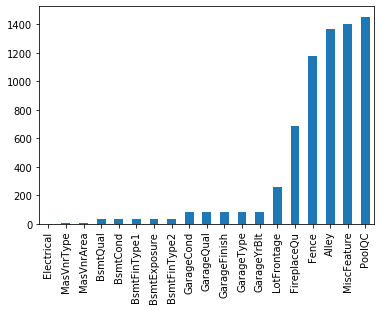

In [5]:
nan_value_train = df_train.isnull().sum()
nan_value_train = nan_value_train[nan_value_train > 0]
nan_value_train.sort_values(inplace=True)
print (nan_value_train)
nan_value_train.plot.bar()

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64


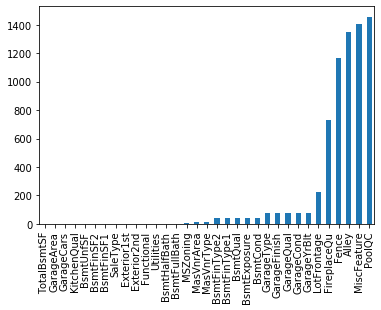

In [6]:
nan_value_test = df_test.isnull().sum()
nan_value_test = nan_value_test[nan_value_test > 0]
nan_value_test.sort_values(inplace=True)
print (nan_value_test)
nan_value_test.plot.bar()

### From the above bar plot and the data we can see that features like Fence, Alley, MiscFeature, PoolQC have more than 70% missing values from 1460 data points. so dropping them

In [7]:
df_train.drop(['Id','Fence','Alley','MiscFeature','PoolQC'],axis=1,inplace=True)
print(df_train.shape)

df_test.drop(['Id','Fence','Alley','MiscFeature','PoolQC'],axis=1,inplace=True)
print(df_test.shape)

(1460, 76)
(1459, 75)


### Getting The numerical and categorical features, we can also see that in numerical feature there are few data time feature also lets get them also

In [8]:
#Getting the categorical and numerical features from train dataset 
cat_feature_train = df_train.select_dtypes(include='object').columns
print(cat_feature_train)
num_feature_train = df_train.select_dtypes(exclude='object').columns
print(num_feature_train)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'Ga

In [9]:
#Getting the categorical and numerical features from train dataset 
cat_feature_test = df_test.select_dtypes(include='object').columns
print(cat_feature_test)
num_feature_test = df_test.select_dtypes(exclude='object').columns
print(num_feature_test)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'Ga

In [10]:
cat_count = len(cat_feature_train)
num_count = len(num_feature_train)
print('Number of Categorical Features in train dataset:',cat_count, ',Number of Numerical Features in train dataset:', num_count, ',Total Features in train dataset:', cat_count+num_count)

Number of Categorical Features in train dataset: 39 ,Number of Numerical Features in train dataset: 37 ,Total Features in train dataset: 76


In [11]:
cat_count_test = len(cat_feature_test)
num_count_test = len(num_feature_test)
print('Number of Categorical Features in test dataset:',cat_count_test, ',Number of Numerical Features in test dataset:', num_count_test, ',Total Features in test dataset:', cat_count_test+num_count_test)

Number of Categorical Features in test dataset: 39 ,Number of Numerical Features in test dataset: 36 ,Total Features in test dataset: 75


### In the numerical feature there are few feature which have a date time data, so getting the features and their unique values to find their impact on target feature SalePrice

In [12]:
date_feature_train = [columns for columns in num_feature_train if 'Yr' in columns or 'Year' in columns]
print(date_feature_train)
for columns in date_feature_train:
    print(columns, df_train[columns].unique())

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000.

In [13]:
date_feature_test = [columns for columns in num_feature_test if 'Yr' in columns or 'Year' in columns]
print(date_feature_test)
for columns in date_feature_test:
    print(columns, df_test[columns].unique())

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
YearBuilt [1961 1958 1997 1998 1992 1993 1990 1970 1999 1971 1975 2009 2005 2003
 2002 2006 2004 1920 1974 2000 2010 1967 1978 1966 1964 1962 1952 1949
 1959 1956 1955 1948 1960 1963 1900 1957 1938 1923 1890 1910 1922 1950
 1925 1939 1940 1942 1936 1930 1915 1912 1917 1907 1968 1977 1927 1947
 1954 1987 1996 1972 1945 1924 1931 1941 1994 1989 1921 1896 1976 2008
 1965 1973 1984 1985 1991 1969 1995 1980 2007 1986 1981 1951 1953 1935
 1902 1946 1934 1983 1880 1979 2001 1916 1918 1988 1937 1905 1928 1926
 1929 1914 1895 1982 1879 1901 1919 1932]
YearRemodAdd [1961 1958 1998 1992 1994 2007 1990 1970 1999 1971 1975 2010 2005 2006
 2004 2002 1950 1993 2000 2003 1967 1978 1966 1964 2001 2008 2009 1959
 1956 1952 1955 1960 1984 1954 1957 1962 1997 1980 1968 1987 1979 1996
 1972 1985 1991 1989 1977 1976 1973 1986 1969 1995 1974 1981 1965 1951
 1953 1963 1982 1988 1983]
GarageYrBlt [1961. 1958. 1997. 1998. 1992. 1993. 1990. 1970. 1999. 1971.

Text(0.5, 1.0, 'year sold vs selling price')

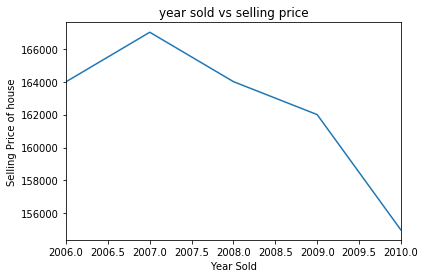

In [14]:
#Visualizing YrSold with Sale price our dependent feature
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Selling Price of house')
plt.title("year sold vs selling price")


### As years are icreasing from 2006 to 2010 the sale price is decreasing for the houses

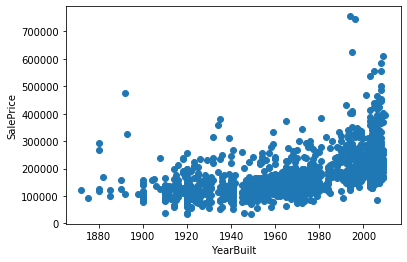

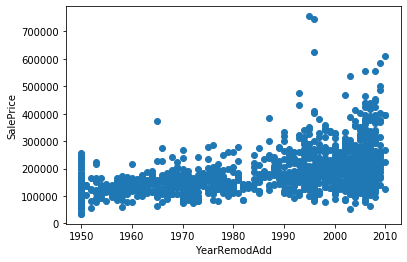

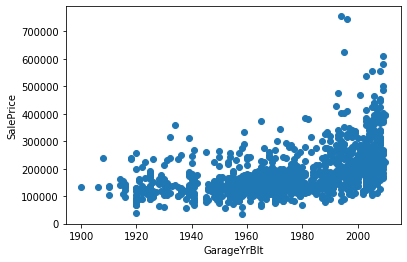

In [15]:
#Visualizing the remaining date feature wrt SalePrice dependent feature
for columns in date_feature_train:
    if columns != 'YrSold':
        plt.scatter(df_train[columns],df_train['SalePrice'])
        plt.xlabel(columns)
        plt.ylabel('SalePrice')
        plt.show()

### Scatter plot shows that if houses are built, renovated or garage is build in 2000 or later the Sale Price is high as old the house is getting the selling price is also decreasing. There are also outliers in the data

In [16]:
#Checking the range of values in each numerical feature
for columns in num_feature_train:
    print(columns, df_train[columns].unique())

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1

### There are lot of features in num feature including date_feature which have unique values more than 20 so dividing them into discrete feature with unique feature equal to 20 at max, rest all will be in continuous features 

In [17]:
#Getting discrete features from numerical features in train dataset
disc_feature_train = [columns for columns in num_feature_train if len(df_train[columns].unique()) <= 20 and columns not in date_feature_train]
print(disc_feature_train)
print("Total Discrete Features in train dataset : ", len(disc_feature_train))

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
Total Discrete Features in train dataset :  15


In [18]:
#Getting discrete features from numerical features intest dataset
disc_feature_test = [columns for columns in num_feature_test if len(df_test[columns].unique()) <= 20 and columns not in date_feature_test]
print(disc_feature_test)
print("Total Discrete Features in test dataset : ", len(disc_feature_test))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
Total Discrete Features in test dataset :  16


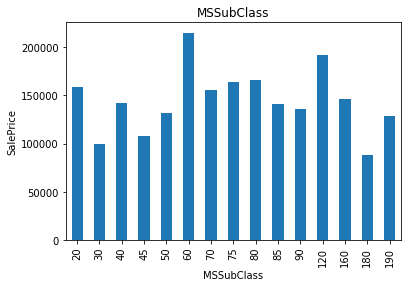

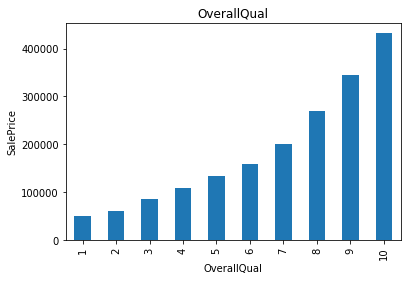

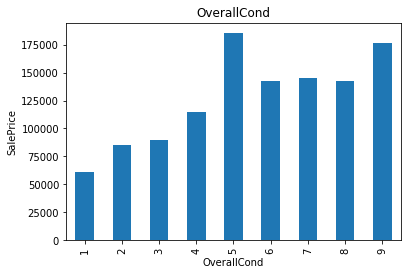

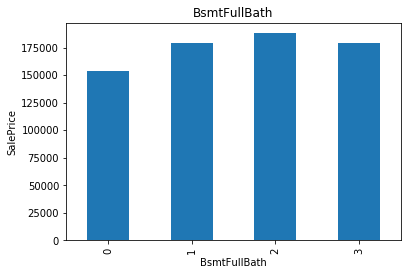

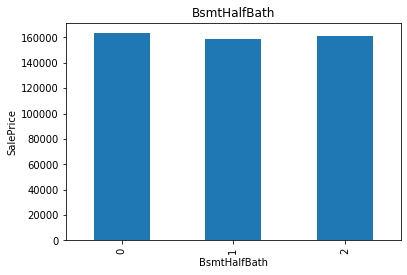

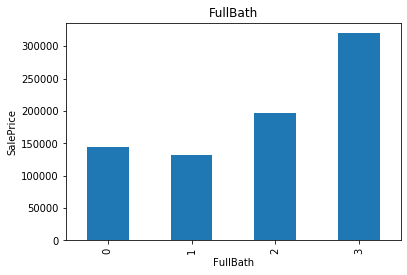

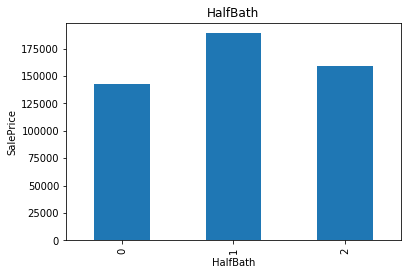

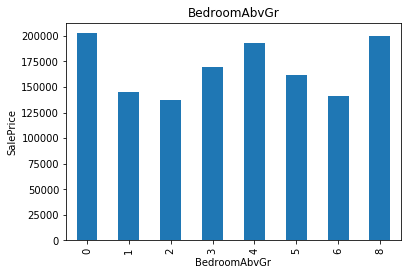

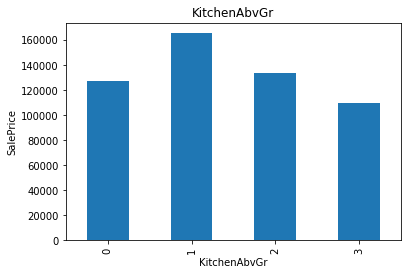

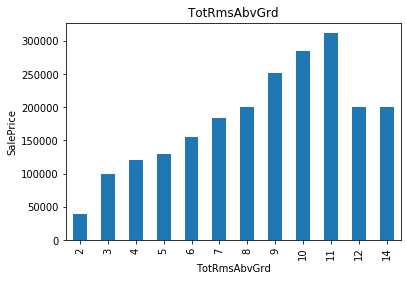

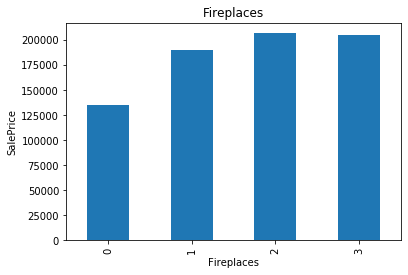

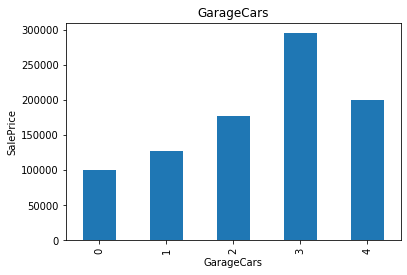

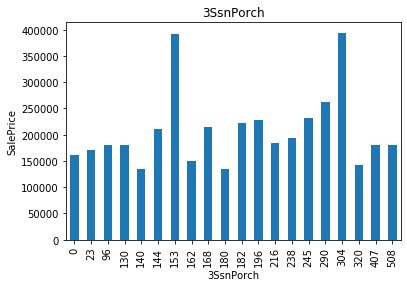

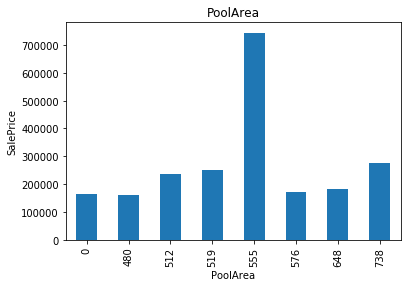

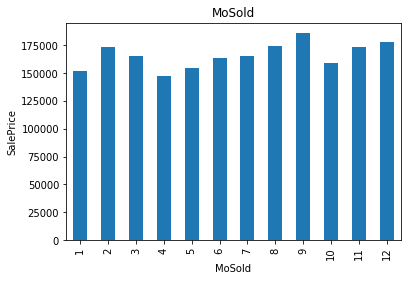

In [19]:
#Visualizing each discrete feature wrt SalePrice the Dependent feature
for columns in disc_feature_train:
    df_train.groupby(columns)['SalePrice'].median().plot.bar()
    plt.xlabel(columns)
    plt.ylabel('SalePrice')
    plt.title(columns)
    plt.show()

### The above plot show that few features like OverallQuality and FullBath have a strong relation with target feature SalePrice

In [20]:
#Getting continuous feature from numerical features for train dataset
cont_feature_train = [columns for columns in num_feature_train if columns not in disc_feature_train+date_feature_train]
print(cont_feature_train)
print('Total Continuous Features', len(cont_feature_train))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
Total Continuous Features 18


In [21]:
#Getting continuous feature from numerical features for test dataset
cont_feature_test = [columns for columns in num_feature_test if columns not in disc_feature_test+date_feature_test]
print(cont_feature_test)
print('Total Continuous Features', len(cont_feature_test))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']
Total Continuous Features 16


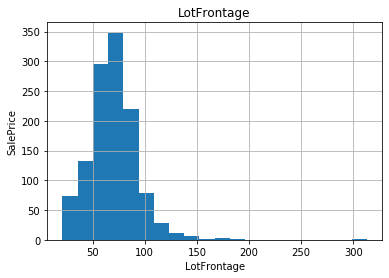

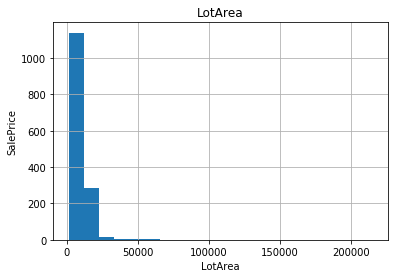

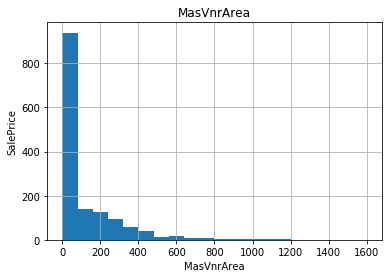

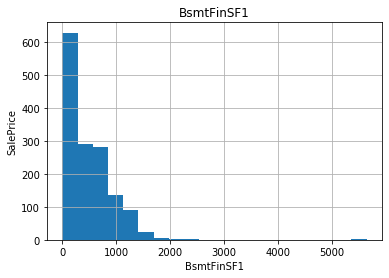

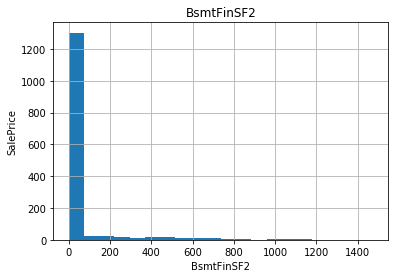

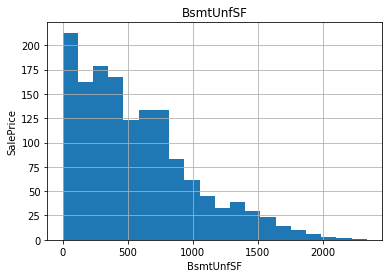

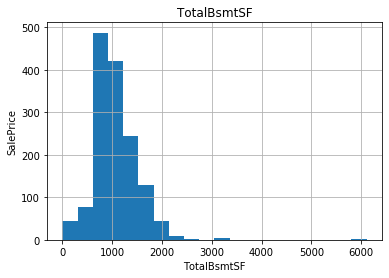

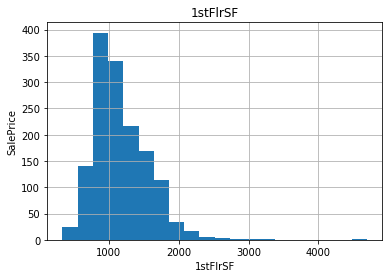

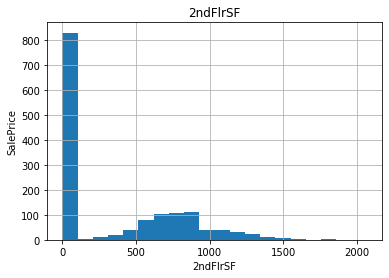

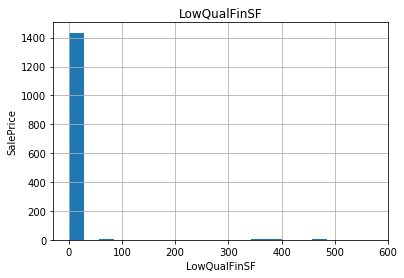

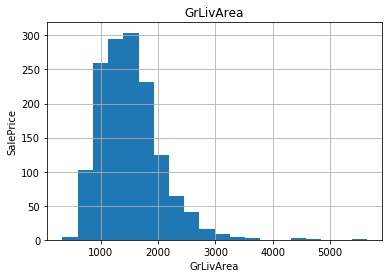

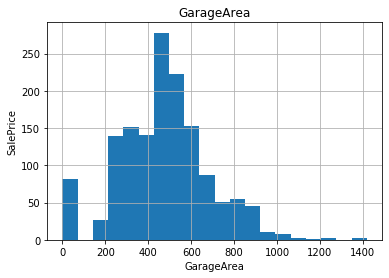

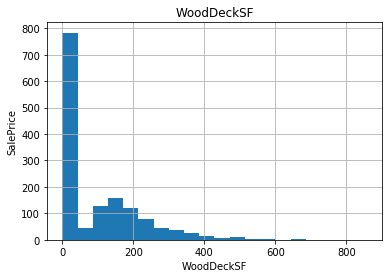

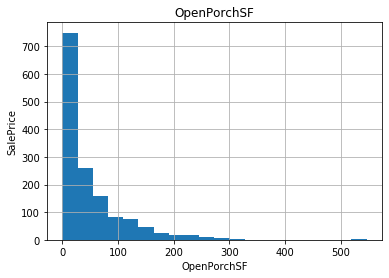

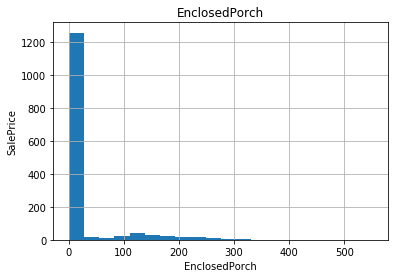

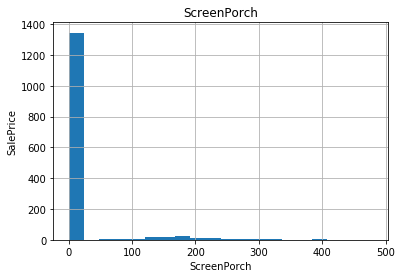

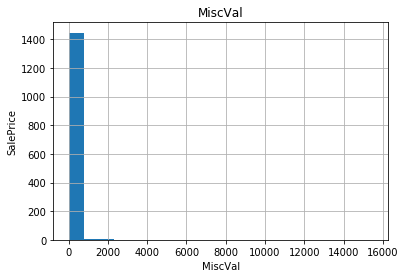

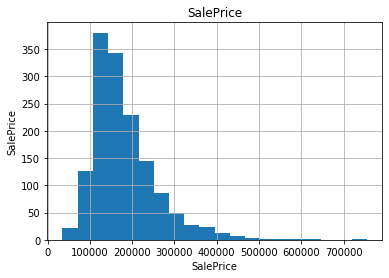

In [22]:
#Visualizing continuous feature wrt SalePrice the dependent feature
for columns in cont_feature_train:
    df_train[columns].hist(bins = 20)
    plt.xlabel(columns)
    plt.ylabel('SalePrice')
    plt.title(columns)
    plt.show()

### Most of the features in continuos features seem to be skewed.

In [23]:
#Getting the Categorical Features and unique values for each categorical feature in train dataset
for columns in cat_feature_train:
    print(columns, df_train[columns].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

In [24]:
#Getting the Categorical Features and unique values for each categorical feature in test dataset
for columns in cat_feature_test:
    print(columns, df_test[columns].unique())

MSZoning ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities ['AllPub' nan]
LotConfig ['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
Condition1 ['Feedr' 'Norm' 'PosN' 'RRNe' 'Artery' 'RRNn' 'PosA' 'RRAn' 'RRAe']
Condition2 ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']
BldgType ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
RoofMatl ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']
Exterior1st ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'A

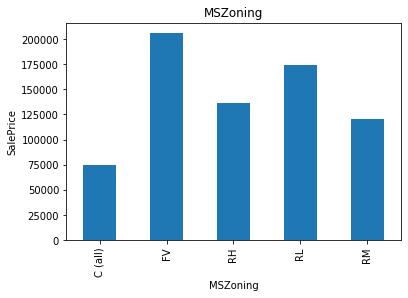

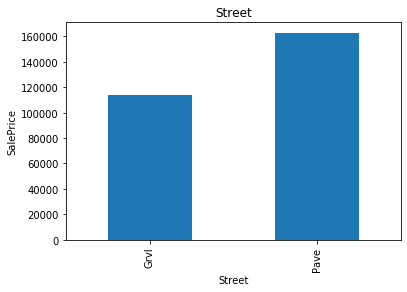

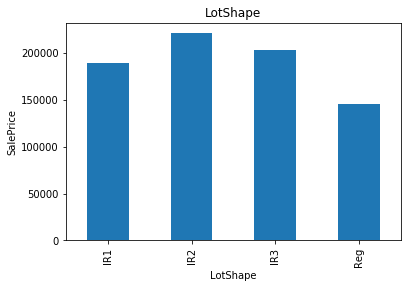

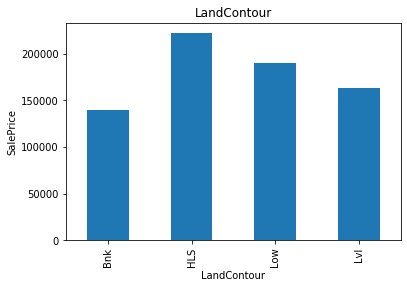

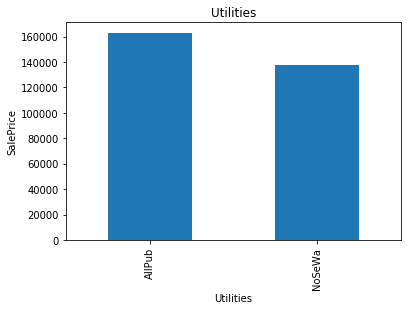

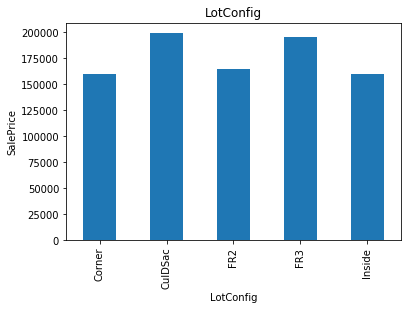

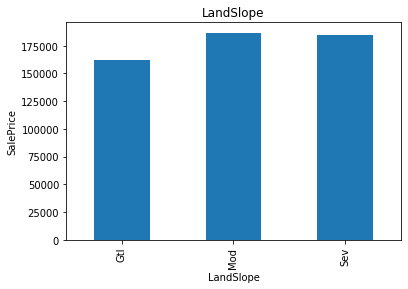

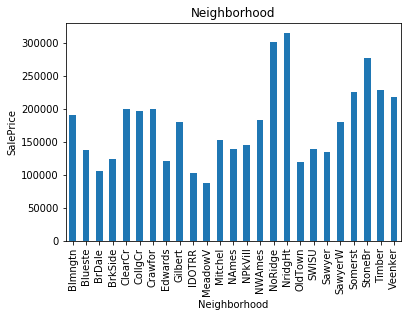

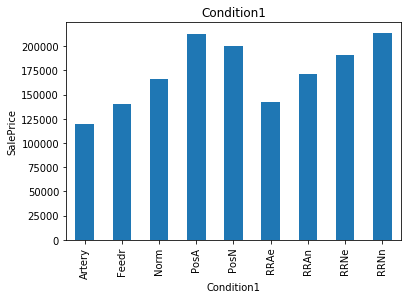

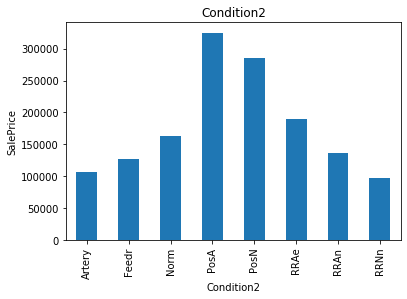

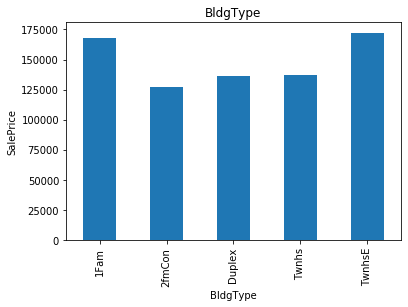

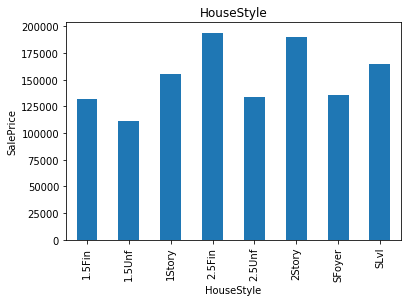

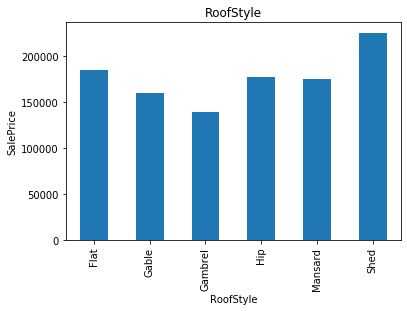

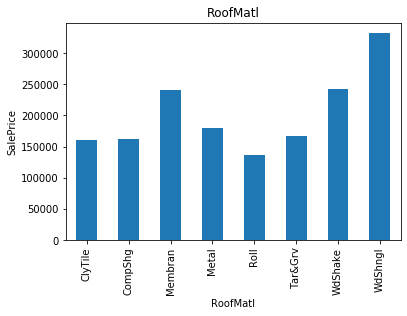

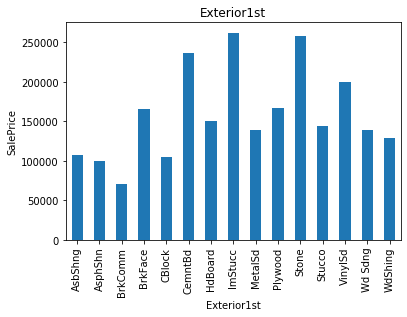

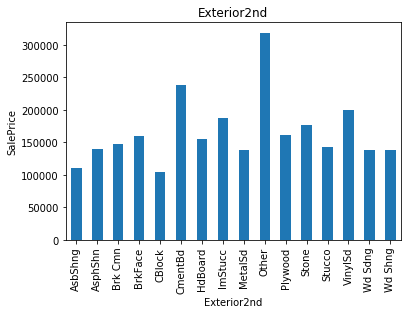

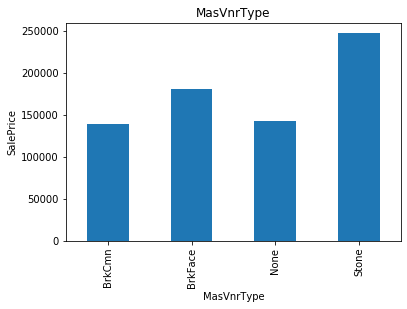

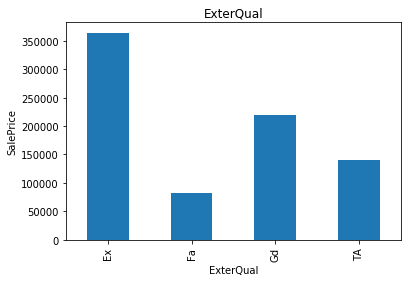

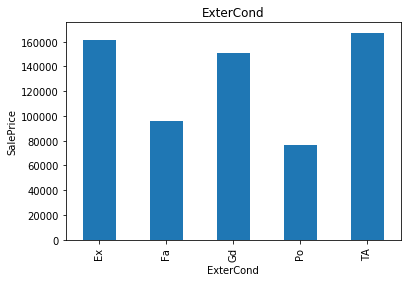

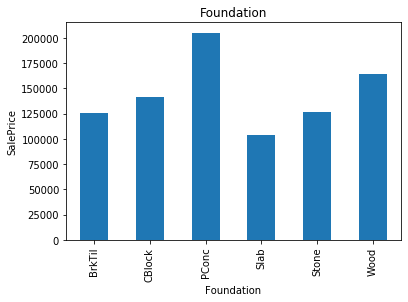

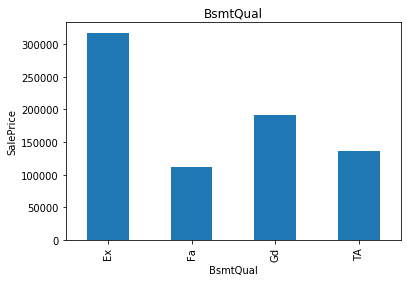

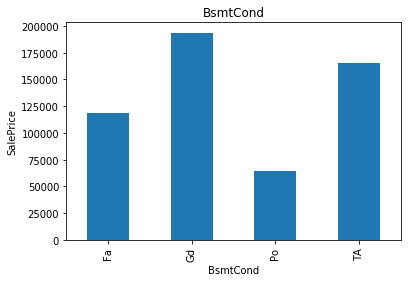

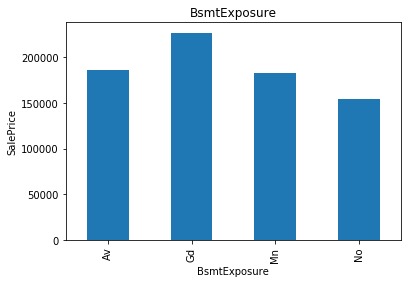

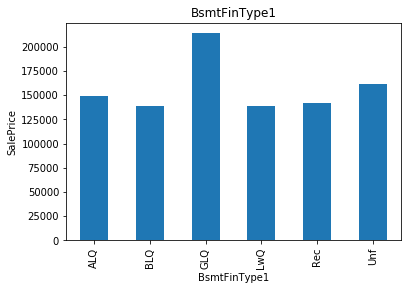

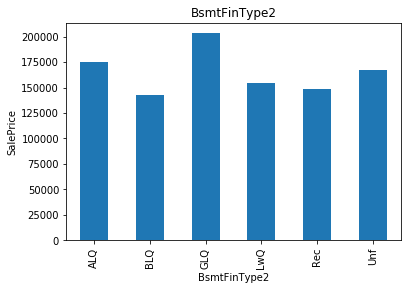

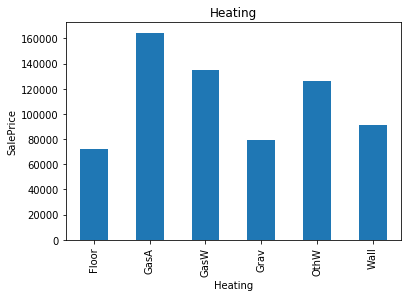

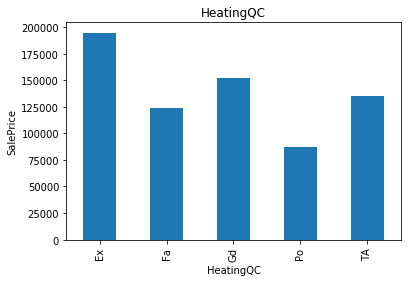

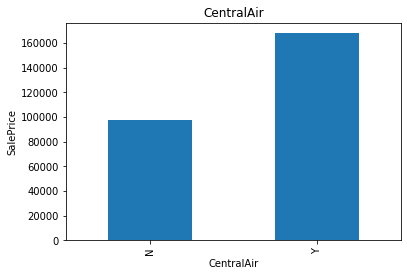

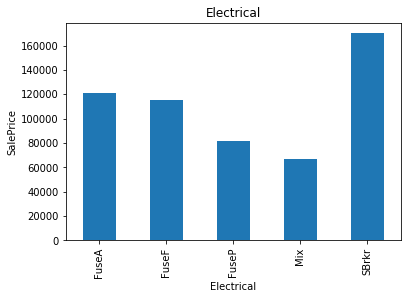

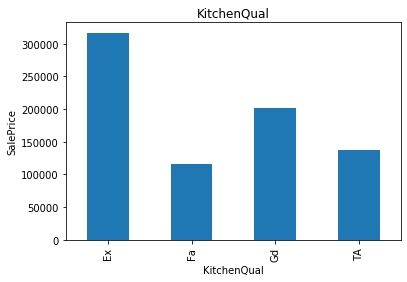

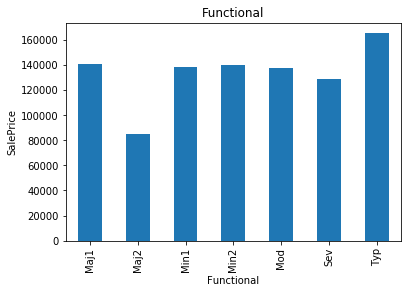

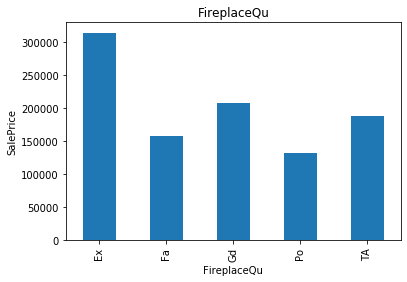

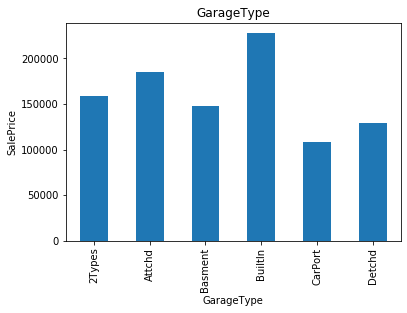

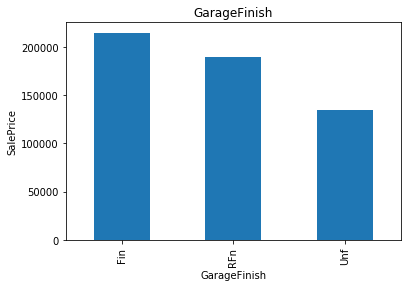

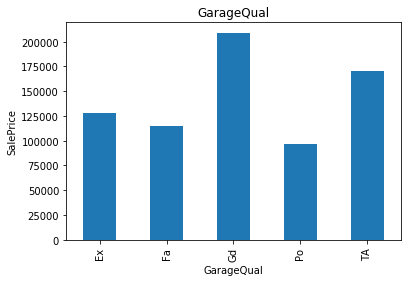

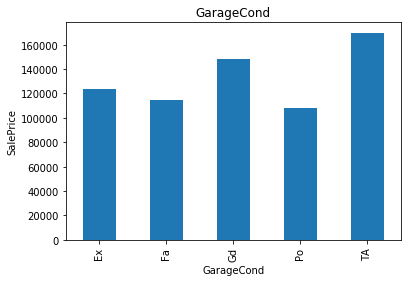

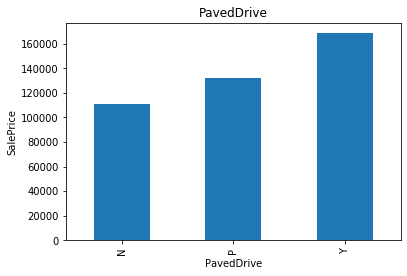

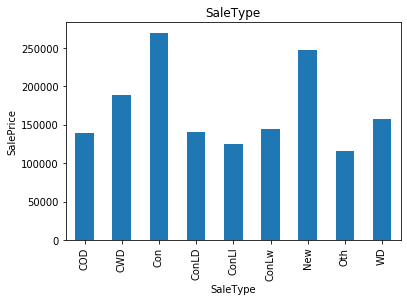

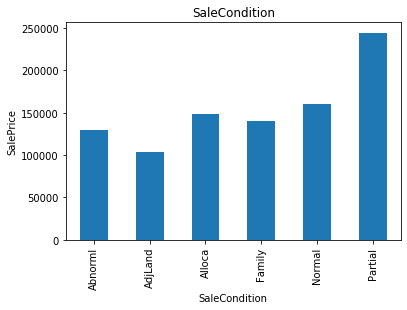

In [25]:
#plotting the categorical variable with SalePrice the dependent feature:
for columns in cat_feature_train:
    df_train.groupby(columns)['SalePrice'].median().plot.bar()
    plt.xlabel(columns)
    plt.ylabel('SalePrice')
    plt.title(columns)
    plt.show()

### Most of the categorical feature have unique values less than 10 for few unique values are more.

### Handling Missing values

In [26]:
#Missing values in train dataset
nan_value_train = df_train.isnull().sum()
nan_value_train = nan_value_train[nan_value_train > 0]
nan_value_train.sort_values(inplace=True)
print (nan_value_train)

Electrical        1
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
BsmtExposure     38
BsmtFinType2     38
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
LotFrontage     259
FireplaceQu     690
dtype: int64


In [27]:
#Missing values in test dataset
nan_value_test = df_test.isnull().sum()
nan_value_test = nan_value_test[nan_value_test > 0]
nan_value_test.sort_values(inplace=True)
print (nan_value_test)

BsmtUnfSF         1
GarageArea        1
GarageCars        1
KitchenQual       1
TotalBsmtSF       1
BsmtFinSF2        1
BsmtFinSF1        1
SaleType          1
Exterior1st       1
Exterior2nd       1
Utilities         2
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
MSZoning          4
MasVnrArea       15
MasVnrType       16
BsmtFinType2     42
BsmtFinType1     42
BsmtQual         44
BsmtExposure     44
BsmtCond         45
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageQual       78
GarageCond       78
LotFrontage     227
FireplaceQu     730
dtype: int64


### Filling the missing values: numerical feature with median of the feature value, categorical feature with mode of the feature value

### For train dataset

In [28]:
for col in date_feature_train:
    if col in nan_value_train:
        df_train[col] = df_train[col].fillna(df_train[col].median())
    else:
        pass

In [29]:
#Transforming date features on basic of year sold
for col in date_feature_train:
    if col != 'YrSold':
        df_train[col] = df_train['YrSold'] - df_train[col]
    else:
        pass

In [30]:
#Numerical features have outliers so filling nan-values with median
for col in num_feature_train:
    if col in nan_value_train and col not in date_feature_train:
        df_train[col] = df_train[col].fillna(df_train[col].median())
    else:
        pass

In [31]:
#Catagorical feature with mode
for col in cat_feature_train:
    if col in nan_value_train:
        df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    else:
        pass

In [32]:
#Checking if there are any nan values in any columns in the train dataset
col = [col for columns in df_train[columns] if df_train[col].isnull().sum() > 0]
print(col)

[]


### For test dataset

In [33]:
for col in date_feature_test:
    if col in nan_value_test:
        df_test[col] = df_test[col].fillna(df_test[col].median())
    else:
        pass

In [34]:
#Transforming date features on basic of year sold
for col in date_feature_test:
    if col != 'YrSold':
        df_test[col] = df_test['YrSold'] - df_test[col]
    else:
        pass

In [35]:
for col in num_feature_test:
    if col in nan_value_test and col not in date_feature_test:
        df_test[col] = df_test[col].fillna(df_test[col].median())
    else:
        pass

In [36]:
for col in cat_feature_test:
    if col in nan_value_test:
        df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
    else:
        pass

In [37]:
#Checking if there are any nan values in any columns in the test dataset
col = [col for columns in df_test[columns] if df_test[col].isnull().sum() > 0]
print(col)

[]


### Applying Feature encoding on categorical features

In [38]:
#For Train dataset
for c in cat_feature_train:
    lbl = LabelEncoder()
    lbl.fit(df_train[c].values)
    df_train[c] = lbl.transform(df_train[c].values)

In [39]:
#For Test dataset
for c in cat_feature_test:
    lbl = LabelEncoder()
    lbl.fit(df_test[c].values)
    df_test[c] = lbl.transform(df_test[c].values)

In [40]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,5.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,31.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,7.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,8.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,8.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [41]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,2,1,49.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,2,1,52.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,4,1,13.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,2,1,12.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,2,1,18.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,1,2010,8,4


### Checking the correlation of Independent features with dependent feature SalePrice

In [42]:
#Checking the correlation of all features with SalePrice and sorting them with value
cols =df_train[df_train.columns].corr()['SalePrice']
print(cols.sort_values(ascending = False).drop_duplicates)

<bound method Series.drop_duplicates of SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
CentralAir       0.251328
Electrical       0.234945
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
BedroomAbvGr     0.168213
GarageCond       0.134740
                   ...   
MasVnrType       0.018216
LandContour      0.015453
Condition2       0.007513
BsmtFinSF2      -0.011378
Utilities       -0.014314
BsmtHalfBath    -0.01684

### Transforming the categorical features: Applying log transformation

In [43]:
#For train dataset
for col in cont_feature_train:
    if 0 in df_train[col].unique():
        pass
    else:
        df_train[col]=np.log(df_train[col])

In [44]:
#For test dataset
for col in cont_feature_test:
    if 0 in df_test[col].unique():
        pass
    else:
        df_test[col]=np.log(df_test[col])

In [45]:
corr = df_train.corr()

In [46]:
corr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.477364,-0.462668,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,-0.028746,-0.041968,-0.117817,-0.031336,-0.089159,-0.137229,-0.029850,0.023573,-0.017161,-0.003254,0.058126,-0.041065,-0.013652,-0.064221,0.016599,-0.069836,0.041195,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.051945,-0.288607,0.307886,0.046474,0.081717,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,0.033443,0.090719,-0.082451,0.012301,-0.040110,-0.098672,0.007630,0.002927,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.073959
MSZoning,0.035900,1.000000,-0.132310,-0.098816,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,0.307520,0.173441,-0.000301,0.005133,-0.008558,0.006963,-0.028279,-0.062830,0.200536,-0.096041,-0.235174,0.128245,-0.010528,0.037209,0.024688,-0.049128,-0.031718,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070818,-0.061582,-0.051481,0.011520,-0.103578,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,-0.009943,0.116007,0.262217,0.167501,-0.157042,-0.189250,-0.150802,-0.083272,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.188860
LotFrontage,-0.477364,-0.132310,1.000000,0.653416,-0.034299,-0.157327,-0.051420,0.002895,-0.169801,0.060018,0.106366,0.000940,0.002908,-0.532315,-0.018354,0.204398,-0.031360,-0.086305,-0.058585,0.163180,0.066951,0.100773,0.135639,-0.029418,0.140183,-0.160906,0.036713,0.091300,-0.135492,0.048796,-0.106034,-0.008545,0.166011,-0.027024,0.038405,0.140659,0.328387,-0.017877,-0.075503,0.052940,0.037393,0.422404,0.046298,0.024590,0.320432,0.066103,-0.002510,0.162890,0.015991,0.267471,0.013833,-0.162261,0.319206,0.039469,0.224109,0.072712,-0.224425,-0.038714,-0.206878,0.272562,0.317183,0.035923,0.027529,0.078044,0.088199,0.122983,0.018190,0.063526,0.051054,0.107592,0.011237,0.019995,0.004364,-0.023457,0.063665,0.345755
LotArea,-0.462668,-0.098816,0.653416,1.000000,-0.105723,-0.285425,-0.104666,0.023403,-0.187106,0.255881,0.104687,0.058578,0.028729,-0.564935,-0.045572,0.178215,-0.006305,-0.023095,-0.029424,0.142942,0.173382,0.085403,0.103894,-0.007293,0.122350,-0.107621,-0.003444,0.019089,-0.100212,-0.006767,-0.146220,-0.028393,0.230969,-0.062491,0.092214,0.077247,0.351838,0.000072,-0.038262,0.057671,0.030284,0.467465,0.080465,0.012810,0.385435,0.138273,0.045218,0.179187,0.038717,0.279176,0.001678,-0.115271,0.360129,-0.010965,0.327754,0.092138,-0.190974,0.020146,-0.170305,0.272007,0.322045,0.014904,0.018301,0.023293,0.199846,0.147224,0.010951,0.055700,0.097381,0.091791,0.047791,0.010521,-0.027164,-0.002437,0.053602,0.399918
Street,-0.024969,0.087654,-0.034299,-0.105723,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,-0.011561,-0.071657,0.002039,-0.018243,0.023704,0.058823,0.042848,-0.022203,-0.067091,-0.019732,0.008081,0.002505,0.006166,0.010007,0.017108,0.049976,0.005874,

### Applying PCA for dimentionality reduction

### On Training dataset

In [47]:
#Seperating the features inti x and y for PCA 
x = df_train.iloc[:, 0: -1]
y = df_train.iloc[:, -1]

In [48]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [49]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.073375,-0.045532,-0.075869,-0.133231,0.064238,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-1.043259,-0.869941,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.514104,-0.777976,0.364207,0.835599,-0.324152,0.281048,0.628912,-0.429918,0.575425,0.307315,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.302403,-0.803570,1.161852,-0.120242,0.529260,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,-0.430030,-0.686776,-1.008328,-0.281887,0.311725,0.351000,0.215646,0.186019,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-0.872563,-0.045532,0.572424,0.113442,0.064238,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,-0.183465,0.390141,-0.491516,-0.125797,-0.508251,-0.661060,0.387047,-0.570750,0.663451,0.364207,-0.549162,-0.324152,0.281048,-1.128430,-1.518697,1.171992,0.307315,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.302403,0.418585,-0.795163,-0.120242,-0.381846,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,1.792425,-0.686776,0.073805,-0.281887,0.311725,-0.060731,0.215646,0.186019,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,0.073375,-0.045532,0.065007,0.420061,0.064238,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-0.977121,-0.821476,-0.491516,-0.125797,0.743092,0.751626,-1.241449,0.325915,-0.777976,0.364207,0.835599,-0.324152,0.281048,-0.249759,-0.429918,0.092907,0.307315,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.302403,-0.576560,1.189351,-0.120242,0.659675,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.318683,0.255978,0.600495,1.792425,-0.686776,-0.925087,-0.281887,0.311725,0.631726,0.215646,0.186019,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.313867,0.208502
3,0.309859,-0.045532,-0.325778,0.103347,0.064238,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.800676,0.632464,-0.491516,-0.125797,1.055928,1.316701,0.387047,-0.570750,0.663451,0.364207,-1.933923,0.832969,-2.792584,0.628912,-1.518697,-0.499274,0.307315,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.302403,-0.439287,0.937276,-0.120242,0.541511,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.296763,0.255978,0.600495,-0.430030,1.586905,-0.883467,0.950313,1.650307,0.790804,0.215646,0.186019,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,0.073375,-0.045532,0.724756,0.878409,0.064238,-1.378933,0.314667,-0.02618,-0.628316,-0.225716,0.457215,-0.036289,-0.03174,-0.411691,1.026689,1.374795,-0.517200,-0.944052,-0.724547,-0.491516,-0.125797,0.743092,0.751626,-1.241449,1.366489,-0.777976,0.364207,0.835599,-0.324152,0.281048,-2.007101,-0.429918,0.463568,0.307315,-0.288653,-0.174865,0.199680,-0.123046,-0.884658,0.263813,0.302403,0.112267,1.617877,-0.120242,1.282191,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,-0.409369,1.527656,0.255978,0.600495,1.792425,-0.686776,-0.883467,-0.281887,1.650307,1.698485,0.215646,0.186019,0.289745,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.313867,0.208502


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC-1', 'PC-2','PC-3','PC-4','PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10'])

In [51]:
principalDf.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,2.178988,-0.733571,-1.789092,0.975037,-1.195219,-0.864172,0.154183,-0.891545,-0.143596,-1.803064
1,0.370633,-0.648726,2.375514,0.824584,-0.829399,0.594254,-1.179079,-0.421991,-0.483538,0.492622
2,2.759448,-0.415114,-1.120079,1.247476,-1.825608,-0.771286,0.740090,-1.023547,-0.561369,-0.294932
3,-1.267579,1.723237,0.195677,0.462345,-0.508030,-1.979560,-0.099125,-0.118929,1.013117,-0.759238
4,5.114240,1.266720,-0.374800,1.843493,-1.144779,-0.700162,0.628848,-1.223090,-0.087490,-0.593655


In [52]:
finalDf = pd.concat([principalDf, df_train[['SalePrice']]], axis = 1)

In [53]:
finalDf.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,SalePrice
0,2.178988,-0.733571,-1.789092,0.975037,-1.195219,-0.864172,0.154183,-0.891545,-0.143596,-1.803064,12.247694
1,0.370633,-0.648726,2.375514,0.824584,-0.829399,0.594254,-1.179079,-0.421991,-0.483538,0.492622,12.109011
2,2.759448,-0.415114,-1.120079,1.247476,-1.825608,-0.771286,0.740090,-1.023547,-0.561369,-0.294932,12.317167
3,-1.267579,1.723237,0.195677,0.462345,-0.508030,-1.979560,-0.099125,-0.118929,1.013117,-0.759238,11.849398
4,5.114240,1.266720,-0.374800,1.843493,-1.144779,-0.700162,0.628848,-1.223090,-0.087490,-0.593655,12.429216


In [54]:
#Preparing the data for training
X = finalDf[['PC-1', 'PC-2','PC-3','PC-4','PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10']]
y = finalDf['SalePrice']

### PCA on test dataset

In [55]:
a = df_test.iloc[:, :]

In [56]:
a = StandardScaler().fit_transform(a)

In [57]:
pd.DataFrame(a).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,-0.874711,-1.501777,0.622900,0.561781,0.06426,0.742620,0.31870,0.0,0.572445,-0.207992,-0.105672,-1.193183,0.028691,-0.426625,-0.431830,-0.751101,0.400766,0.413784,1.178391,-0.474315,-0.09948,0.683901,0.728946,0.382679,-0.563316,0.673548,0.388852,-0.533007,0.839283,0.290347,0.620425,0.696701,0.063428,-1.578965,0.517537,-0.650461,-0.370716,-0.084379,1.415522,0.272716,0.296079,-0.612768,-0.775254,-0.080483,-1.442220,-0.818068,-0.25816,-1.028720,-0.751040,-1.029543,-0.20391,0.770002,-0.918335,0.25839,-0.898055,-0.401521,-0.689701,0.738617,0.933169,-0.988189,1.185921,0.250409,0.186902,0.339114,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
1,-0.874711,-0.039098,0.660198,0.970361,0.06426,-1.384637,0.31870,0.0,-1.950811,-0.207992,-0.105672,-0.056113,0.028691,-0.426625,-0.431830,-0.054877,0.400766,0.512398,1.320405,2.006065,-0.09948,1.096219,1.048229,-1.293983,0.047057,0.673548,0.388852,-0.533007,0.839283,0.290347,0.620425,-1.557149,1.063511,0.324927,-0.297689,-0.339225,0.639230,-0.084379,1.415522,0.272716,0.296079,0.589032,-0.775254,-0.080483,-0.194791,-0.818068,-0.25816,-1.028720,1.237648,0.175997,-0.20391,-0.422602,-0.255371,0.25839,-0.898055,-0.401521,-0.689701,0.855119,0.933169,-0.988189,-0.741235,0.250409,0.186902,0.339114,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905,0.32475,0.201383
2,0.061351,-0.039098,0.388823,0.908374,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.751101,-0.497418,-0.769577,-0.573119,-0.474315,-0.09948,0.683901,0.728946,0.382679,-0.563316,0.673548,0.388852,0.833702,-0.265874,0.290347,0.620425,-0.430224,0.773377,0.324927,-0.297689,-0.954831,-0.266784,-0.084379,0.269754,0.272716,0.296079,-0.505796,0.891944,-0.080483,0.449232,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,0.770002,-0.255371,0.25839,0.647066,1.918553,-0.689701,-0.659405,-1.491575,0.301406,0.042537,0.250409,0.186902,0.339114,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905,0.32475,0.201383
3,0.061351,-0.039098,0.546884,0.257876,0.06426,-1.384637,0.31870,0.0,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.054877,0.400766,-0.802448,-0.573119,-0.474315,-0.09948,0.683901,0.728946,-1.293983,-0.450284,0.673548,0.388852,0.833702,0.839283,0.290347,0.620425,-0.430224,0.357958,0.324927,-0.297689,-0.526882,-0.271303,-0.084379,-0.876014,0.272716,0.296079,-0.512373,0.837243,-0.080483,0.400297,-0.818068,-0.25816,0.773083,1.237648,0.175997,-0.20391,-0.422602,0.407593,0.25839,0.647066,-0.401521,-0.689701,-0.698239,-1.491575,0.301406,-0.012788,0.250409,0.186902,0.339114,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905,0.32475,0.201383
4,1.465443,-0.039098,-1.241112,-1.116906,0.06426,-1.384637,-2.53396,0.0,0.572445,-0.207992,1.590431,-0.056113,0.028691,2.866737,-0.431830,1.337571,-0.497418,-0.605221,-0.289090,-0.474315,-0.09948,-0.965374,-1.186753,0.382679,-0.563316,-0.734340,0.388852,0.833702,-0.265874,0.290347,0.620425,-1.557149,-0.387160,0.324927,-0.297689,1.059048,0.528520,-0.084379,-0.876014,0.272716,0.296079,0.474514,-0.775254,-0.080483,-0.313657,-0.818068,-0.25816,0.773083,-0.751040,-1.029543,-0.20391,-0.422602,-0.918335,0.25839,-0.898055,-0.401521,-0.689701,-0.465235,-0.279203,0.301406,0.153187,0.250409,0.186902,0.339114,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905,0.32475,0.201383


In [58]:
pca_test = PCA(n_components=10)
principalComponents_test = pca_test.fit_transform(a)
principalDf_test = pd.DataFrame(data = principalComponents_test
                     , columns = ['PC-1', 'PC-2','PC-3','PC-4','PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10'])

In [59]:
principalDf_test.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-2.702133,1.892002,0.545044,-0.358601,-2.169462,-0.716552,0.334909,0.355385,0.702410,-0.214020
1,-0.107397,2.439075,2.841345,1.290757,-0.342295,-0.957792,0.425336,-2.496461,-1.562477,-0.364541
2,1.498030,-0.907592,-0.718808,1.862513,-2.189250,0.298353,1.629208,-0.504293,-0.346341,1.369587
3,1.931625,-1.169560,-0.721386,1.548891,-2.210054,0.449825,0.805801,-0.549094,-0.219471,0.412865
4,1.299554,0.821633,-3.144181,-1.613400,2.250408,-0.751522,-0.995277,0.502504,-0.100803,1.467624


### Applying models on the dataset

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state = 9)

### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred = linreg.predict(X_test)

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8765390956328948

In [64]:
pred_test = linreg.predict(principalDf_test)

In [65]:
print(pred_test[0])

11.782833495849866


In [66]:
y_test.head(1)

1068    11.927681
Name: SalePrice, dtype: float64

### Adding column Sale_Price to the output dataset

In [67]:
Sale_price_df = pd.DataFrame({'Sale_Price':pred_test})

In [68]:
df = pd.concat([principalDf_test,Sale_price_df],axis='columns')

In [69]:
df.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,Sale_Price
0,-2.702133,1.892002,0.545044,-0.358601,-2.169462,-0.716552,0.334909,0.355385,0.702410,-0.214020,11.782833
1,-0.107397,2.439075,2.841345,1.290757,-0.342295,-0.957792,0.425336,-2.496461,-1.562477,-0.364541,12.106798
2,1.498030,-0.907592,-0.718808,1.862513,-2.189250,0.298353,1.629208,-0.504293,-0.346341,1.369587,12.135764
3,1.931625,-1.169560,-0.721386,1.548891,-2.210054,0.449825,0.805801,-0.549094,-0.219471,0.412865,12.187081
4,1.299554,0.821633,-3.144181,-1.613400,2.250408,-0.751522,-0.995277,0.502504,-0.100803,1.467624,12.177771
